In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
quantization_factor = 16  # quantization value for dct
t_sim = 5          # threshold distance based on similarity 
t_distance = 10    # threshold distance between pixels 
vector_limit = 10  # shift vector elimination limit
block_counter = 0  # to track the count of blocks
block_size = 8     # choosing 8 as ideal size
image = cv2.imread('zebra.jpg')  #reading the image

In [ ]:
gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)     # converting image to it's gray scale image
arr1 = []
arr = np.array(gray_scale)                               # storing in array
#mask = np.array(mask_gray)
predicted_mask = np.zeros((arr.shape[0], arr.shape[1]))  # generating predicted mask
col = arr.shape[1] - block_size                       # saving column values
row = arr.shape[0] - block_size                          # saving row values
dct = np.empty((((col+1)*(row+1)), quantization_factor+2))

In [ ]:
print("Zig zag scanning & dct starting...")

for i in range(0, row):           # traversing in row
    for j in range(0, col):       # traversing in col  

        block_val = arr[i:i+block_size, j:j+block_size]
        val = np.float32(block_val) / 255.0  # float conversion/scale
        dcts = cv2.dct(val)  # the dct 
        block_val = np.uint8(np.float32(dcts) * 255.0 ) # converting back
        # zigzag scanning
        result = [[] for k in range(block_size + block_size - 1)]
        for k in range(block_size):                  # traversing block by block
            for l in range(block_size):
                sum_val = k + l
                if (sum_val % 2 == 0):
                    # adding at beginning
                    result[sum_val].insert(0, block_val[k][l])
                else:
                    # adding at end of the list
                    result[sum_val].append(block_val[k][l])

        for item in range(0,(block_size*2-1)):
            arr1 += result[item]
       
        arr1 = np.asarray(arr1, dtype=np.float)  
        #print(arr1.shape)        # converting the input to an array
        if i == 0 and j == 0 :
          print(arr1)
        arr1 = np.array(arr1[:16])
       
        arr1 = np.floor(arr1/quantization_factor)        # return the floor of input element_wise
        if i == 0 and j == 0 :
          print(arr1)
        arr1 = np.append(arr1, [i, j])                   # append values to end of the array
        #print(arr1)
        if i == 0 and j == 1 :
          print(arr1)
        np.copyto(dct[block_counter], arr1)
       
        block_counter += 1
        arr1 = []

print("scanning & dct over!")

Zig zag scanning & dct starting...
[240.   5.   0.  10.   2.   9.   5. 255.   0.   5.   3.   0.   2.   0.
   3.   0.   0.   0.   0.   0.   0.   4. 255.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255.   0.]
[15.  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.]
[14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
scanning & dct over!


In [ ]:
print("lexicographic ordering starting...")

#dct = dct[~np.all(dct == 0, axis=1)]       # Test whether all array elements along a given axis evaluate to true
dct = dct[np.lexsort(np.rot90(dct))]       # array is rotated by 90 degree in plane specified by the axis

print("lexicographic ordering over!")

lexicographic ordering starting...
lexicographic ordering over!


In [ ]:
print("Mathematical i.e eucledian operations starting...")

similar_arr = []
for i in range(0, block_counter-10):
    #if i <= block_counter-10:
        for j in range(i+1, i+10):
            pixel_sim = np.linalg.norm(dct[i][:16]-dct[j][:16])
            point_dis = np.linalg.norm(dct[i][-2:]-dct[j][-2:])
            if pixel_sim <= t_sim and point_dis >= t_distance:      # here we check the threshold values
                similar_arr.append([dct[i][16], dct[i][17], dct[j][16], dct[j][17],dct[i][16]-dct[j][16], dct[i][17]-dct[j][17]])
print(similar_arr)    
print("operations over!")

Mathematical i.e eucledian operations starting...
[[0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 13.0, 189.0, -13.0, -189.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 13.0, 189.0, -13.0, -189.0], [0.0, 0.0, 14.0, 131.0, -14.0, -131.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 13.0, 189.0, -13.0, -189.0], [0.0, 0.0, 14.0, 131.0, -14.0, -131.0], [0.0, 0.0, 15.0, 190.0, -15.0, -190.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 13.0, 189.0, -13.0, -189.0], [0.0, 0.0, 14.0, 131.0, -14.0, -131.0], [0.0, 0.0, 15.0, 190.0, -15.0, -190.0], [0.0, 0.0, 15.0, 191.0, -15.0, -191.0], [0.0, 0.0, 5.0, 281.0, -5.0, -281.0], [0.0, 0.0, 5.0, 286.0, -5.0, -286.0], [0.0, 0.0, 13.0, 189.0, -13.0, -189.0], [0.0, 0.0, 14.0

In [ ]:
print("elimination starting...")

similar_arr = np.array(similar_arr)          # similarity array
del_vec = []                                 # declaring delete vector
vector_counter = 0                           # initiallizing the vector counter value
for i in range(0, similar_arr.shape[0]):
    for j in range(1, similar_arr.shape[0]):
        if similar_arr[i][4] == similar_arr[j][4] and similar_arr[i][5] == similar_arr[j][5]:
            vector_counter += 1
    if vector_counter < vector_limit:
        del_vec.append(similar_arr[i])
    vector_counter = 0
#print(del_vec)
del_vec = np.array(del_vec)
del_vec = del_vec[~np.all(del_vec == 0, axis=1)]      # Test whether all array elements along a given axis evaluate to true
del_vec = del_vec[np.lexsort(np.rot90(del_vec))]      # array is rotated by 90 degree in plane specified by the axis
#print(del_vec)


for item in del_vec:
    print(item)
    index = np.where(similar_arr == item)
    print(index[0])
    print(index[1])
    unique, count = np.unique(index[0], return_counts=True)
    print(unique.shape)
    print(count)
    for i in range(0, unique.shape[0]):
        if count[i] == 6:
            similar_arr = np.delete(similar_arr,unique[i],axis=0)
print(similar_arr)
print("elimination over!")

In [ ]:
print("Localization starting...")

for i in range(1, similar_arr.shape[0]):         # traversing over the similarity array
    pos1 = int(similar_arr[i][0])                # finding pos1
    pos2 = int(similar_arr[i][1])                # finding pos2
    pos3 = int(similar_arr[i][2])                # finding pos3
    pos4 = int(similar_arr[i][3])                # finding pos4
    for j in range(0,7):                         # traversing block by block
        for k in range(0,7):
            predicted_mask[pos1+j][pos2+k] = 255 # assigining to predicted mask
            predicted_mask[pos3+j][pos4+k] = 255

print("Localization over!")


Localization starting...
Localization over!


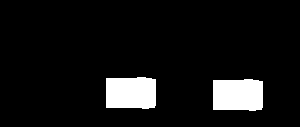

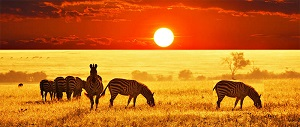

In [ ]:
cv2_imshow(predicted_mask)
#cv2_imshow("Real Mask", mask_image)
cv2_imshow(image)
#cv2_imshow(gray_scale)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
mask_image = cv2.imread('zebra_mask.png')
mask_gray = cv2.cvtColor(mask_image, cv2.COLOR_RGB2GRAY)
mask_image = np.array(mask_gray)


In [ ]:
print("accuracy calculating...")

TP = 0    # True Positive (number that have been correctly detected as forged )
FP = 0    # False Positive (number that have been incorrectly detected as forged)
TN = 0    # True Negative (forged areas that is forged but not included)
FN = 0    # False Negative (forged areas that are falsely missed) 

for i in range(1, predicted_mask.shape[0]):
    for j in range(1, predicted_mask.shape[1]):
        if predicted_mask[i][j] == mask_image[i][j]:        # here we are comparing the real mask image ande our generated mask image 
            if predicted_mask[i][j] == 255:
                TP += 1
            else:
                TN += 1
        else:
            if predicted_mask[i][j] == 255:
                FP += 1
            else:
                FN += 1

#  Precision signiﬁes the probability correct forgery of the detected blocks as forgery
#  recall determines the probability of forged blocks in the image that are detected

precision = TP/(TP+FP)                      # calculating precision value
print('Precision is:',precision)     
recall = TP/(TP+FN)                         # calculating recall value
print('Recall is:',recall)
accuracy = 2*precision*recall/(precision+recall)*100    # calculating accuracy percentage

print('Accuracy:', accuracy)

print("accuracy calculated!")



accuracy calculating...
Precision is: 0.9940397350993377
Recall is: 0.8910655981003265
Accuracy: 93.97401784316794
accuracy calculated!
